# The Data Science Process

## Professional Ethics

Data Science and Machine Learning (and more broadly Computer Science) have great power. The techniques we will learn in this class are leading to algorithms giving computers the ability to make decisions based on a wealth of information. Facial recongition, credit and loan decisions, insurance pricing, are all examples of ways in which the tools we are learning in this class are being used.

It is not then surprising that with these tools comes some questions of professional ethics. Today we will discuss a few things to keep in mind. The first step in our Data Science process is to consider the ethical implications of the data collection and question we are setting out on.

#### Models Inherit Biases from the Data

If your model is built upon data from a system with biases (credit data for example), it is likely your model will inherit those biases. It is not enough to say that the process of building the model does not introduce bias, we also must be aware of whether the data we build that model from has biases. 

#### Keep in Mind the Consequences of Errors

As you build your model keep in mind the consequences of the errors in your model in the event it goes into production. These should guide you in the level of accuracy and the types and proportions of errors you can tolerate. An algorithm estimating the age of a tree from some features versus one being used to determine a likliehood that a prisoner will reoffend if paroled have different tolerances of error. 

#### Research on Human Subjects

There are restrictions on how data can be collected and used when the research is being conducted on human subjects. At federally funded institutions, proposals to do research on human subjects must be reviewed by institutional review boards. They are looking for among other things: How the privacy of subjects is being protected, how the risk of harm to subjects is being minimized, and how subjects are informed of their rights. Of particular importance is protecting vulnerable subjects (minors and prisoners for example).

This review must be done before data collection can be begin (typically).

There are similar reviews that must occur for Research on Animals.

#### Commitments Made about Data and Data Analysis

In obtaining permission from an Institutional Review Board, or permission from a company or individual owning data you wish to use, you or your company might make some promises about how that data will be used or how it will be protected. For example, in obtaining permission from Twitter to access their API you will be required to promise that you will not seek to obtain information about the political affiliation of an individual user, or that you will not publish content from Twitter without their permission. You need to honor promises that you or your employer have made regarding data and its protection. This is essential to ensuring trust in the profession, and to protecting vulnerable populations and individuals' privacy, and it is essential to protecting yourself. 

#### Follow the Error Control Process

It is essential that when you finish the development of your model that you have as good an understanding of the accuracy of your model as you can. For example, the accuracy of your model, and the consequences for error may be one of the ethical issues you have dealt with. However even if your model is realtively innocous, you need to be able to understand its utility and pay off were it to be used in production. 

It is essnetial in your data science work that you follow a process that will result in an valid esitmate of the accuracy of your model. 

## Controlling for Error

### Error in Regression Problems

For today the gathering data process will be something we do here in Python by simmulating some data. Before we dive into an exploratory data analysis and developing a model, we should make a plan for how we will estimate the error of our model. Or even what we mean by the error of our model.

Today, because I want us to be sure we understand the sources of error in our analysis we will build the dataset in Python in a way where we actually know the *correct model*. You should be thinking about the House Pricing problem or one of the other regression problems we have talked about.

Suppose we have a predictor feature $x$ and a resulting value $y$ that have a linear relationship, however because we cannot possibly account for all of the variation there is some *Irreducible Error*. That is when we build our sample, there is a random variable that comes along with it.


In [1]:
# Using the usual packages, plus scikitlearns LinearRegression tool; and numpy.random.

import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [55]:
# Building a sample with a linear relationship y = 10 x + 7 + E; where E is a random normally 
# distributed error term with mean 0 and variance 200.

x = 500*rn.random_sample(20)
y = 10*x + 7 + 200*rn.randn(20)

In [56]:
# Furthermore let's suppose there are a couple of data points that have a different E for
# some reason 

xa = np.array([700, 300])
ya = np.array([10*700 + 7 - 1500, 10*300 + 7 + 1500])

In [57]:
# Make a pandas.DataFrame of this data

dfx = pa.DataFrame(x, columns=['x'])
dfx['a'] = 0
dfx['y'] = y
dfx2 = pa.DataFrame(xa, columns=['x'])
dfx2['a'] = 1
dfx2['y'] = ya
df = dfx.append(dfx2, ignore_index=True)
df.tail()

,x,a,y
17,116.365145,0,1164.270123
18,435.416129,0,4106.918466
19,273.488029,0,2913.853864
20,700.000000,1,5507.000000
21,300.000000,1,4507.000000


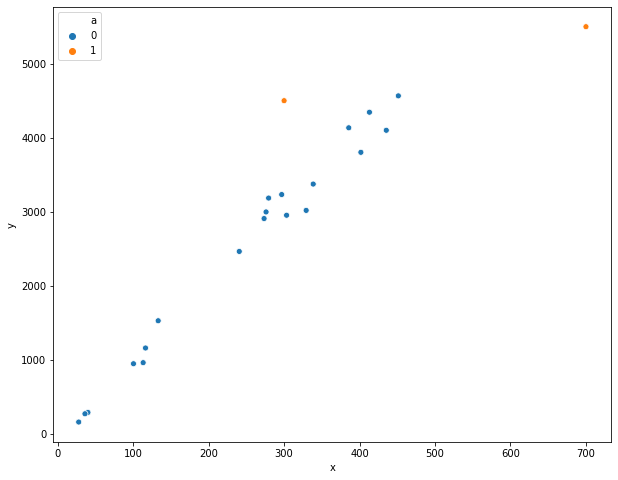

In [58]:
plt.figure(figsize=(10, 8))

sn.scatterplot(x='x', y='y', hue='a', data=df);

Note the presence of a relationship between predictor and result is readily apparent: 
$$ y = m x + b + E $$
The goal of regression is to estimate the true values of the slope and intercept $(m, b)$ of this relationship. So note that there will be two sources of error: 

- Reduccible Error: This is error that we can eliminate by using a better model for the relationship. It is due in this example to us using a sample.
- Irreduccible Error, $E$: This is the underlying error we introduced when we simulated the data. In real data it is due to factors not included in the model. This cannot be removed and our goal is instead to understand this term.

### Making Test and Training Sets

The first control measure we will make is to divide our data into a *test set* and a *training set*. We will build our model from the training set with the goal of making it perform as well on that as we can. We will then apply it to the test set to determine how well we did. This partitioning method will protect us from overfitting (as we get to more complicated examples we will see examples where overfitting is likely and a big concern). 

What is *overfitting*?  Overfitting is when the model we have built was based on the sample of the data we were given and was led astray from the true relationship. This leads to models that will perform well on their training data but poorly when applied to new data. For linear relationships and linear models, overfitting is not a big problem, but for nonlinear and higher dimensional relations it becomes more likely.


In [59]:
# First convert the predictor and result variables into numpy.arrays suitable for applying in 
# scikitlearn functions (recall we did this last class)

# We will keep the 'a' flag identifying our special points

X = np.array(df[['x', 'a']])
y = np.array(df['y'])

In [62]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [63]:
# Make sure the a=1 points are in X_train

set(X_test[:, 1])

{0.0}

### Regression Error

Let us take an estimate for the slope and intercept, choosen mostly at random.

In [64]:
m, b = 9, 0

We then use this to estimate $$\hat{y} = m x + b$$

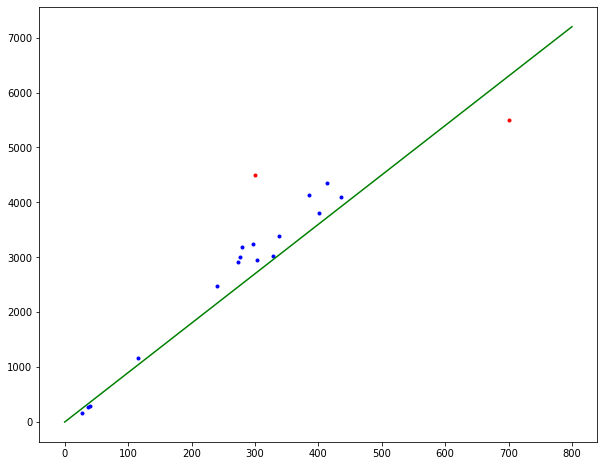

In [65]:
plt.figure(figsize=(10, 8))

plt.plot(X_train[X_train[:, 1]==0, 0], y_train[X_train[:, 1]==0], 'b.')
plt.plot(X_train[X_train[:, 1]==1, 0], y_train[X_train[:, 1]==1], 'r.')
x = np.linspace(0, 800, 10)
yhat = m*x + b
plt.plot(x, yhat, 'g-');

We need a measurement of the error between our estimates $\hat{y}$ and the actual training data. We will then choose $m$ and $b$ so that this error is minmized. There are then two tricks: 

- There are different choices of error that may make sense.
- Once we have choosen one we need to choose the parameters that minimize it (or at least estimate them)

A common choice of the error is sum of the square residual errors of the predicted $\hat{y}$ from the sample values $y_i$ in the training set. We will learn in a future class how to compute the linear regression minimizing this choice of error. This gives the *Explained Variance* of the training set by the model.


In [66]:
yhat = m*X_train[:, 0]+b
EV = sum( (yhat - y_train)**2 )
EV

6353667.902183641

The scikitlearn LinearRegression function will determine the model that minimizes this error.

In [67]:
reg = LinearRegression().fit(X_train[:, 0].reshape(-1, 1), y_train)

In [68]:
b, m = reg.intercept_, *reg.coef_
b, m

(374.2401757092339, 8.810062609375718)

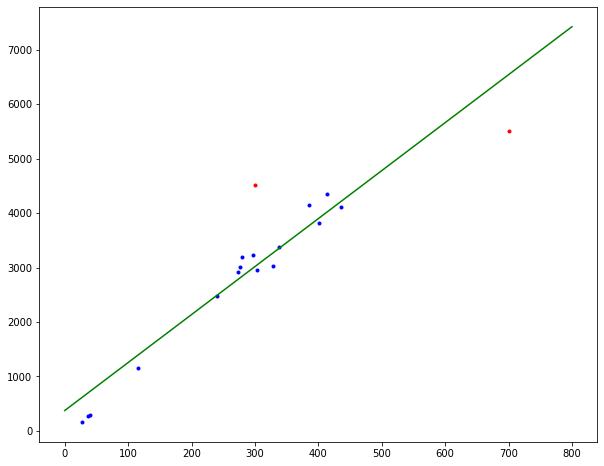

In [69]:
plt.figure(figsize=(10, 8))

plt.plot(X_train[X_train[:, 1]==0, 0], y_train[X_train[:, 1]==0], 'b.')
plt.plot(X_train[X_train[:, 1]==1, 0], y_train[X_train[:, 1]==1], 'r.')
x = np.linspace(0, 800, 10)
yhat = m*x + b
plt.plot(x, yhat, 'g-');

In [70]:
# Explained Variance using these values:

yhat = m*X_train[:, 0]+b
EV = sum( (yhat - y_train)**2 )
EV

4500448.605436743

Note: We missed the true relationship, particularly the intercept. Why?

Of course this total error (*Explained Variance*) is not a great measure of how good our model was, as obviously it depends on the magnitudes and variations of the sample $y_i$. 

The *Total Variance* is given by the sum of the squares of the differences of the training data and the mean of the training data. 

In [71]:
y_mean = np.mean(y_train)
TV = sum( (y_train - y_mean)**2 )
TV

40129336.7914888

If the regression line correctly explains the variations of the data, i.e. if our model correctly accounts for all of the errors relative to the extent to which the $y_i$ vary anyway, then the ratio of *Explained Variance* to *Total Variance* will be small; $R^2$ is defined to be 1 minus this ratio. Notice though that if the Total Variance is large compared to the Explained Variance this will also result in an $R^2$ that is near 1. 

In [72]:
R2 = 1 - EV/TV
R2

0.8878514083394654

Note each time we run the cells above, with the dataset fixed, for this computation we will get slightly different values of $m$, $b$, and $R^2$. This is because the sample and the division into training and testing sets is different each time.

### Checking the Influence of Individual Points

Note that we have, or suspect we have, some samples that do not fit the same pattern as the rest of the data. An important question is to consider the impact that these samples have on the model we have computed. We do that by computing the linear regression with each point removed. Normally we would not know what points do not fit with the others (though we may have suspicions) so the best practice is to go through all of them.


In [73]:
n = X_train.shape[0]
lin_reg = [0 for k in range(n)]
R2p = [0 for k in range(n)]
for k in range(n):
    Xtemp = np.append(X_train[:k], X_train[k+1:], axis=0)
    ytemp = np.append(y_train[:k], y_train[k+1:], axis=0)
    lin_reg[k] = LinearRegression().fit(Xtemp[:, 0].reshape(-1, 1), ytemp)
    kEV = sum( (lin_reg[k].predict(X_train[:, 0].reshape(-1, 1)) - y_train)**2 ) 
    R2p[k] = 1 - kEV / TV

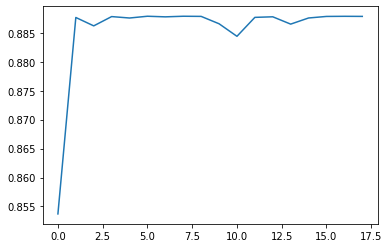

In [74]:
plt.plot(range(n), R2p);  # Plot the sizes of the R2s

In [75]:
min(R2p), R2    # Compare the values of R2

(0.8537173403239189, 0.8878514083394654)

In [76]:
m1 = R2p.index(min(R2p)) # Note the location of the minimum
X_train[m1, :] 

# And we see that the off-pattern value at x=700 gives the minimum R2

array([700.,   1.])

This indicates that this sample has a disproportionate impact on our model. That should make us supicious that there is overfitting being caused by it.

The coefficients without the first one are given below.

In [77]:
b2, m2 = lin_reg[m1].intercept_, *lin_reg[m1].coef_
b2, m2

(9.359553352944658, 10.420455475549483)

Points with much different $y$ values from other $y$ values with similar $x$ values (*outliers*), or points with much different $x$ values from the mean of the $x$ values (*high leverage samples*) have the potnetial to impact the model disproportinately like both of these. It is tempting to treat them differently (i.e. to accept the model computed without them). However we must proceed with caution. These samples may be the result of some error in the data collection, however they may also be valid samples.

Should we include them or not?  A model that has been greatly swayed by a high leverage point may not perform as well on the test data because it has been overfit to these samples. However these high leverage and outlier samples may also be indicative of a pattern in the data. The thing that should give us pause is what happened with the water samples in Flint, MI.

### Using the Test Set

Of course we prepared for this by sequestering some of our data from the training (development) of our model. We can now use this data to check how accurate our model is on data it has not seen. We will run the test on the model computed with all of the training points $(b, m)$, and on the model computed without the outlier point $(b_2, m_2)$. What erorr expression should we use? We have the ready made one given by the *Explained Variance* and $R^2$. 


In [78]:
# Explained Variance of the Training and Testing Sets

yhat_train = m*X_train[:, 0] + b
EV_train = sum( (yhat_train - y_train)**2)

yhat_test = m*X_test[:, 0] + b
EV_test = sum( (yhat_test - y_test)**2)

'Explained Variance for Train and Test: {:.0f}, {:.0f}'.format(EV_train, EV_test)

'Explained Variance for Train and Test: 4500449, 308273'

Note right away this shows why *Explained Variance* is problematic - because the sample sizes are different between testing and training sets these numbers are incomparable.

In [79]:
# Compute R2 of the Training and Testing Sets

y_train_mean = np.mean(y_train)
TV_train = sum( (y_train - y_train_mean)**2)
R2_train = 1 - EV_train / TV_train

y_test_mean = np.mean(y_test)
TV_test = sum( (y_test - y_test_mean)**2)
R2_test = 1 - EV_test / TV_test

'R2 for Train and Test: {}, {}'.format(R2_train, R2_test)

'R2 for Train and Test: 0.8878514083394654, 0.9657549270964818'

Now lets do the same computation for the second regression expression and see if there is a difference:

In [80]:
yhat_train = m2*X_train[:, 0] + b2
EV_train = sum( (yhat_train - y_train)**2)

yhat_test = m2*X_test[:, 0] + b2
EV_test = sum( (yhat_test - y_test)**2) 

y_train_mean = np.mean(y_train)
TV_train = sum( (y_train - y_train_mean)**2)
R2_train_2 = 1 - EV_train / TV_train

y_test_mean = np.mean(y_test)
TV_test = sum( (y_test - y_test_mean)**2)
R2_test_2 = 1 - EV_test / TV_test

'R2 for Train and Test (model 2): {}, {}'.format(R2_train_2, R2_test_2)

'R2 for Train and Test (model 2): 0.8537173403239189, 0.9889961107774579'

### Understanding Training and Testing Error

So remember our model has been choosen, under the restriction of being a linear model, to minimize the training error (giving us the $R^2$ closest to 1). It has never seen the testing data. So we typically expect the testing error to be worse than the training error. Note that the model did better on the testing data without the high impact point. If you increase the size of the sample following the pattern, this difference will decrease.

## Error in Categorization Problems

Consider a categorization problem, this dataset is a collection of data related to study of chronic kidney disease (from the UCI archive). 


In [83]:
kd = pa.read_csv('Data Sets/Kidney/chronic_kidney_disease.csv', 
                 names=['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                        'pus_cell_clumps', 'bacteria', 'blood_glucose', 'blood_urea', 'serum_creatinine', 
                        'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
                        'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                        'appetite', 'pedal_edema', 'anemia', 'class'])

kd.loc[kd.loc[:, 'class'] == 'ckd\t', 'class'] = 'ckd'  # There is an extra tab character on some of the ckd values

kd.head()

,age,bp,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
# There are some missing values for hemoglobin

kd = kd[kd.hemoglobin != '?']  

Note that the goal here is to determine a hemoglobin level that indicates that a patient has *Chronic Kidney Disease*.

### Logistic Regression (Classification)

We first need to develop a model for classification to discuss how error in categorization models is handled. Our first example of a categorization model is a generalization of the *Linear Regression* model we were using above. 

We will consider two models. The first is based on the linear interpolation we used above, and is what we might consider a *naive* generalization. The second is *Logistic Regression*, which despite its name, is derived first as a classification method.

In order to compare our two methods, we will use the *test* set method we introduced above and set aside a portion of our samples to use to train or develop the models and a separate portion to use for testing the models.

In [85]:
# First convert the data to numerical data in numpy arrays
# Note a problem with this data is that the float values for hemoglobin (and other variables) were read as strings
# We need to convert them

X = np.atleast_2d(np.array([float(h) for h in kd.loc[:, 'hemoglobin']])).transpose()

# We need to recode the values for the class to be numeric
rename_class = { 'ckd':1, 'notckd':0}  
y = np.array([rename_class[c] for c in np.array(kd.loc[:, 'class'])])


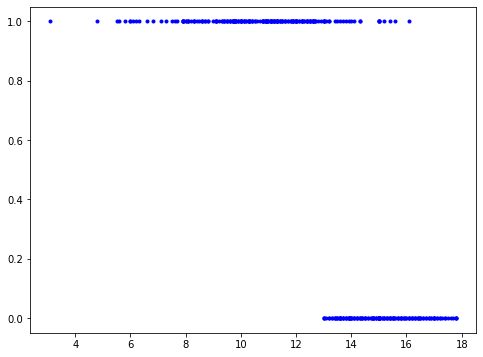

In [86]:
plt.figure(figsize = (8, 6))
plt.plot(X, y, 'b.');

Note that other than the fact that the $y$ values take only 0 or 1 values, this is a similar problem to the regression problem above. So we could try Linear Regression:

In [87]:
reg = LinearRegression().fit(X, y)

b, m = reg.intercept_, *reg.coef_
b, m

(2.2172723316147476, -0.13020984845887595)

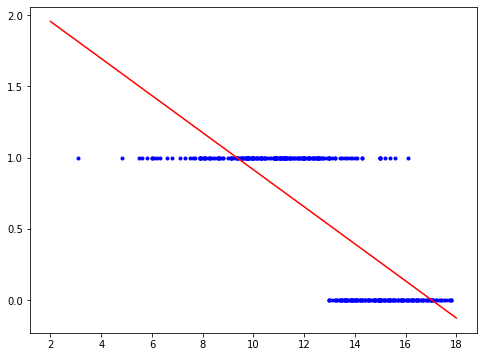

In [88]:
# we round the resulting y values to get the nearest value of 1 or 0
# we round the resulting y values to get the nearest value of 1 or 0

xhat = np.linspace(2, 18, 100)
yhat = m*xhat+b
plt.figure(figsize = (8, 6))
plt.plot(X, y, 'b.')
plt.plot(xhat, yhat, 'r-');

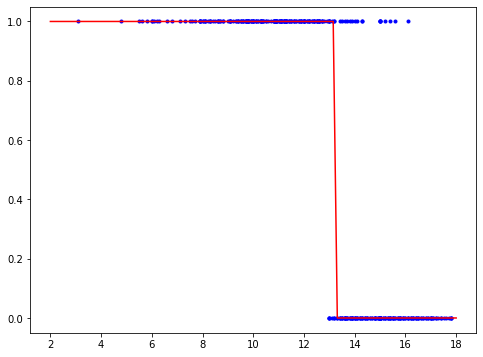

In [89]:
# we round the resulting y values to get the nearest value of 1 or 0

xhat = np.linspace(2, 18, 100)
fix_yhat = {2:1, 1:1, 0:0}
yhat = [fix_yhat[h] for h in np.round(m*xhat+b)]
plt.figure(figsize = (8, 6))
plt.plot(X, y, 'b.')
plt.plot(xhat, yhat, 'r-');

The decision boundary is where $y =  mx + b = 0.5$. 

In [90]:
dec_boundary = (0.5 - b)/m
dec_boundary

13.18849804327291